In [1]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.2 MB/s eta 0:00:00


In [2]:
!apt-get install awscli

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  docutils-common fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript groff gsfonts
  imagemagick imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libimagequant0 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libnetpbm10 libraqm0 libwmflite-0.2-7 netpbm poppler-data psutils
  python3-botocore python3-certifi python3-chardet python3-colorama python3-dateutil
  python3-docutils python3-idna python3-jmespath python3-olefile python3-pil python3-pyasn1
  python3-pygments python3-requests python3-roman python3-rsa python3-s3transfer python3-urllib3
  python3-yaml sgml-base xml-core
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscr

In [10]:
!aws s3 ls

2025-03-11 15:41:03 meu-bucket-first-test


In [11]:
import os

aws_acess_key = os.getenv("AWS Access Key ID")
aws_secret_key = os.getenv("AWS Secret Access Key")
region = "us-east-1"

In [14]:
import boto3

s3 = boto3.client("s3", aws_access_key_id=aws_secret_key, aws_secret_access_key=aws_secret_key, region_name=region)

In [15]:
import pandas as pd
import io

BUCKET_NAME = 'meu-bucket-first-test'
FILE_KEY = 'train.csv'

response = s3.get_object(Bucket=BUCKET_NAME, Key=FILE_KEY)
file_content = response['Body'].read()

df = pd.read_csv(io.BytesIO(file_content))
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [17]:
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [18]:
df.shape

(1200000, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [20]:
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [21]:
lista = ['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation',
          'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback']

for col in lista:
    if col in df.columns:  # Verifique se a coluna existe no DataFrame
        if df[col].dtype in ['int64', 'float64']:  # Verifique se a coluna é numérica
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna('Desconhecido', inplace=True)


<ipython-input-21-dd8ad29ff5dc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-21-dd8ad29ff5dc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [22]:
df.isnull().sum()

,0
id,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0


In [23]:
df.duplicated().sum()

0

In [24]:
print(df['Premium Amount'].max())
print(df['Premium Amount'].min())

4999.0
20.0


In [25]:
total_registros = len(df)
impacto = (df.isin(['Desconhecido']).sum() / total_registros) * 100
print(impacto)

id                       0.000000
Age                      0.000000
Gender                   0.000000
Annual Income            0.000000
Marital Status           1.544083
Number of Dependents     0.000000
Education Level          0.000000
Occupation              29.839583
Health Score             0.000000
Location                 0.000000
Policy Type              0.000000
Previous Claims          0.000000
Vehicle Age              0.000000
Credit Score             0.000000
Insurance Duration       0.000000
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64


In [26]:
df = df[df['Marital Status'] != 'Desconhecido']

In [27]:
df = df[df['Customer Feedback'] != 'Desconhecido']

In [28]:
df.shape

(1105117, 21)

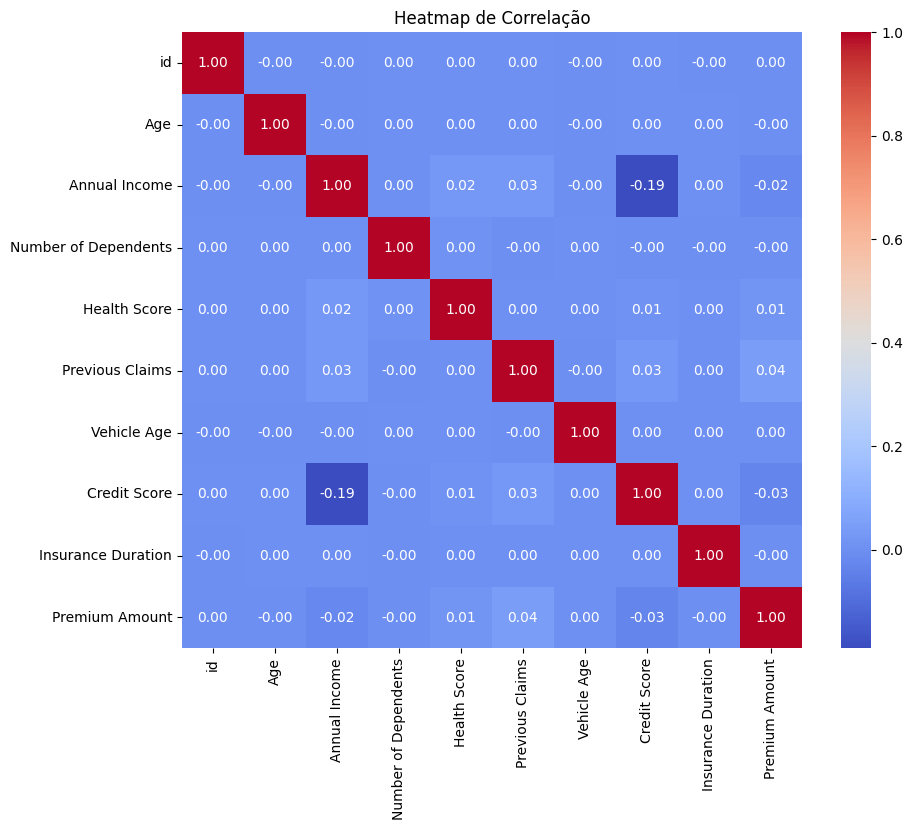

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_df = df[numerical_features]

matrix_correlation = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap de Correlação')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105117 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1105117 non-null  int64  
 1   Age                   1105117 non-null  float64
 2   Gender                1105117 non-null  object 
 3   Annual Income         1105117 non-null  float64
 4   Marital Status        1105117 non-null  object 
 5   Number of Dependents  1105117 non-null  float64
 6   Education Level       1105117 non-null  object 
 7   Occupation            1105117 non-null  object 
 8   Health Score          1105117 non-null  float64
 9   Location              1105117 non-null  object 
 10  Policy Type           1105117 non-null  object 
 11  Previous Claims       1105117 non-null  float64
 12  Vehicle Age           1105117 non-null  float64
 13  Credit Score          1105117 non-null  float64
 14  Insurance Duration    1105117 non-null 

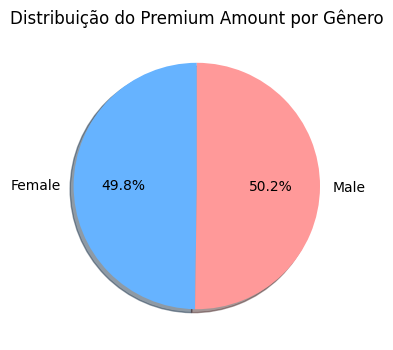

In [31]:
grouped_data = df.groupby('Gender')['Premium Amount'].sum()

labels = grouped_data.index
sizes = grouped_data.values
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Distribuição do Premium Amount por Gênero')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105117 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1105117 non-null  int64  
 1   Age                   1105117 non-null  float64
 2   Gender                1105117 non-null  object 
 3   Annual Income         1105117 non-null  float64
 4   Marital Status        1105117 non-null  object 
 5   Number of Dependents  1105117 non-null  float64
 6   Education Level       1105117 non-null  object 
 7   Occupation            1105117 non-null  object 
 8   Health Score          1105117 non-null  float64
 9   Location              1105117 non-null  object 
 10  Policy Type           1105117 non-null  object 
 11  Previous Claims       1105117 non-null  float64
 12  Vehicle Age           1105117 non-null  float64
 13  Credit Score          1105117 non-null  float64
 14  Insurance Duration    1105117 non-null 

In [33]:
print(df['Age'].values)
print(df['Age'].max())
print(df['Age'].min())

[19. 39. 23. ... 19. 55. 21.]
64.0
18.0


In [34]:
bins = [17, 30, 50, 70]
faixa_etaria = pd.cut(df['Age'].to_numpy(), bins=bins, labels=['Jovem', 'Adulto', 'Idoso'])
df['Faixa_Etaria'] = faixa_etaria
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,Jovem
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,Adulto
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,14.0,595.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,Jovem
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,Jovem
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,Jovem


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105117 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1105117 non-null  int64   
 1   Age                   1105117 non-null  float64 
 2   Gender                1105117 non-null  object  
 3   Annual Income         1105117 non-null  float64 
 4   Marital Status        1105117 non-null  object  
 5   Number of Dependents  1105117 non-null  float64 
 6   Education Level       1105117 non-null  object  
 7   Occupation            1105117 non-null  object  
 8   Health Score          1105117 non-null  float64 
 9   Location              1105117 non-null  object  
 10  Policy Type           1105117 non-null  object  
 11  Previous Claims       1105117 non-null  float64 
 12  Vehicle Age           1105117 non-null  float64 
 13  Credit Score          1105117 non-null  float64 
 14  Insurance Duration    1

In [36]:
Time_part = df['Policy Start Date'].str.split(' ').str[0]
df['Policy Start Year'] = Time_part.str.split('-').str[0]

In [37]:
df = df.drop('Policy Start Date', axis=1)
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,Jovem,2023
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,Adulto,2023
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,14.0,595.0,3.0,Good,Yes,Weekly,House,567.0,Jovem,2023
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,Jovem,2024
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,Jovem,2021


In [38]:
print(df['Vehicle Age'].max())
print(df['Vehicle Age'].min())

19.0
0.0


In [39]:
bins = [-1, 3, 7, 12, 19]

df['Vehicle Age Category'] = pd.cut(df['Vehicle Age'], bins=bins, labels=['Novo', 'Relativamente Novo', 'Usado', 'Antigo'])

In [40]:
df = df.drop('Vehicle Age', axis=1)

In [41]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,372.0,5.0,Poor,No,Weekly,House,2869.0,Jovem,2023,Antigo
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,694.0,2.0,Average,Yes,Monthly,House,1483.0,Adulto,2023,Usado
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,595.0,3.0,Good,Yes,Weekly,House,567.0,Jovem,2023,Antigo
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,Jovem,2024,Novo
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,598.0,4.0,Poor,Yes,Weekly,House,2022.0,Jovem,2021,Usado


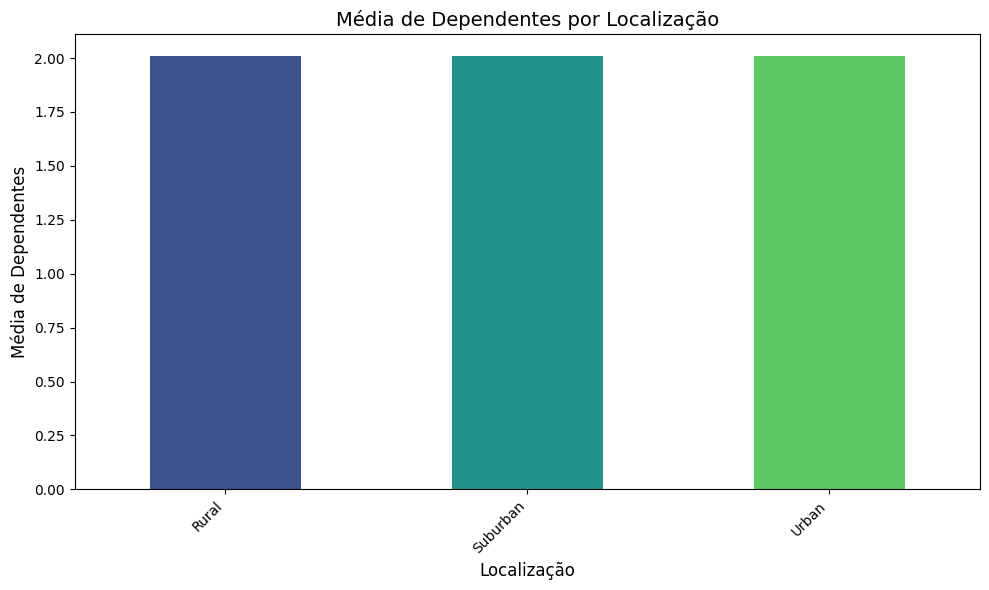

In [42]:
Dependents_per_Location = df.groupby('Location')['Number of Dependents'].mean()

colors = sns.color_palette('viridis', len(Dependents_per_Location))

plt.figure(figsize=(10, 6))
Dependents_per_Location.plot(kind='bar', color=colors)

# Adicionando título e rótulos
plt.title('Média de Dependentes por Localização', fontsize=14)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Média de Dependentes', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotaciona as localizações para melhor visualização
plt.tight_layout()  # Ajuste para não cortar texto
plt.show()

In [43]:
low_limit = df['Annual Income'].quantile(0.33)
high_limit = df['Annual Income'].quantile(0.66)

def classify_income(income):
    if income <= low_limit:
        return 'Baixa'
    elif income <= high_limit:
        return 'Média'
    else:
        return 'Alta'

df['Income_Class'] = df['Annual Income'].apply(classify_income)

In [44]:
df['Income_Class'].value_counts()

,count
Income_Class,
Alta,375733
Baixa,364993
Média,364391


In [45]:
df['Risco_Financeiro (%)'] = df['Premium Amount'] / df['Annual Income']

In [46]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%)
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Poor,No,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,Average,Yes,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Good,Yes,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,Poor,Yes,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Poor,Yes,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995


In [47]:
# Filtrar valores <= 1 (100%)
df = df[df["Risco_Financeiro (%)"] <= 1]

In [48]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%)
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Poor,No,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,Average,Yes,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Good,Yes,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,Poor,Yes,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Poor,Yes,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995


In [49]:
print(df["Risco_Financeiro (%)"].describe())

count    1.057817e+06
mean     9.499830e-02
std      1.604520e-01
min      1.333822e-04
25%      1.559174e-02
50%      3.732412e-02
75%      9.164420e-02
max      1.000000e+00
Name: Risco_Financeiro (%), dtype: float64


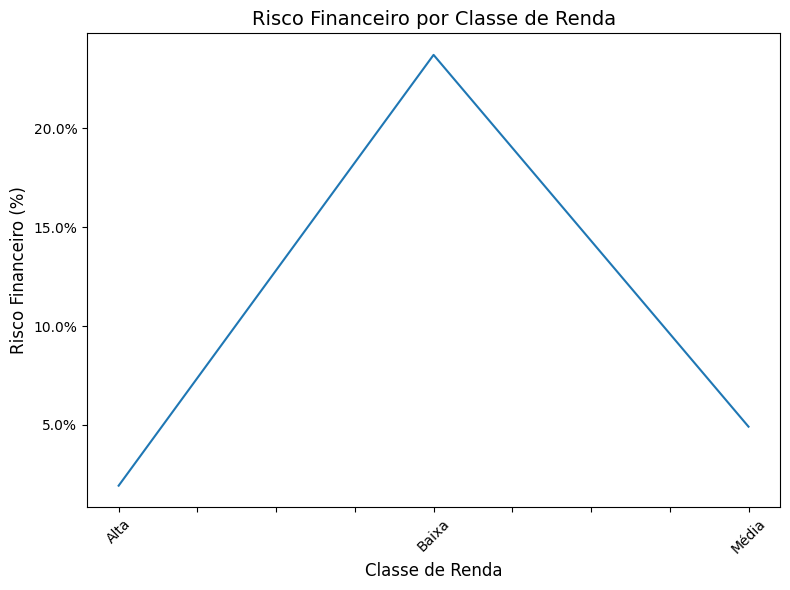

In [50]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 6))
ax = df.groupby('Income_Class')['Risco_Financeiro (%)'].mean().plot(kind='line', legend=False)
ax.set_title("Risco Financeiro por Classe de Renda", fontsize=14)
ax.set_ylabel("Risco Financeiro (%)", fontsize=12)
ax.set_xlabel("Classe de Renda", fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(1))  # Formatar como percentual
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo X
plt.tight_layout()
plt.show()

In [51]:
print(df['Risco_Financeiro (%)'].min())
print(df['Risco_Financeiro (%)'].max())

0.0001333822401547234
1.0


In [52]:
bins = [0.0, 0.1, 0.3, 1.0]
df['Faixa_Risco']= pd.cut(df['Risco_Financeiro (%)'], bins=bins, labels=['Baixo', 'Medio', 'Alto'])

In [53]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,No,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,...,Yes,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Yes,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,...,Yes,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Yes,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


In [54]:
df = df.drop('id', axis=1)
df = df.drop('Age', axis=1)

In [55]:
df.head()

,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,...,No,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,Comprehensive,1.0,...,Yes,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,...,Yes,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,Basic,1.0,...,Yes,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,...,Yes,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


In [56]:
df = df.drop('Insurance Duration', axis=1)
df.head()

,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,...,No,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,Female,31678.0,Divorced,3.0,Master's,Desconhecido,15.569731,Rural,Comprehensive,1.0,...,Yes,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,...,Yes,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,Male,141855.0,Married,2.0,Bachelor's,Desconhecido,10.938144,Rural,Basic,1.0,...,Yes,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,...,Yes,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


In [57]:
from sklearn.preprocessing import LabelEncoder

lista = ['Gender', 'Smoking Status']

for elem in lista:
    le = LabelEncoder()
    df[elem] = le.fit_transform(df[elem])

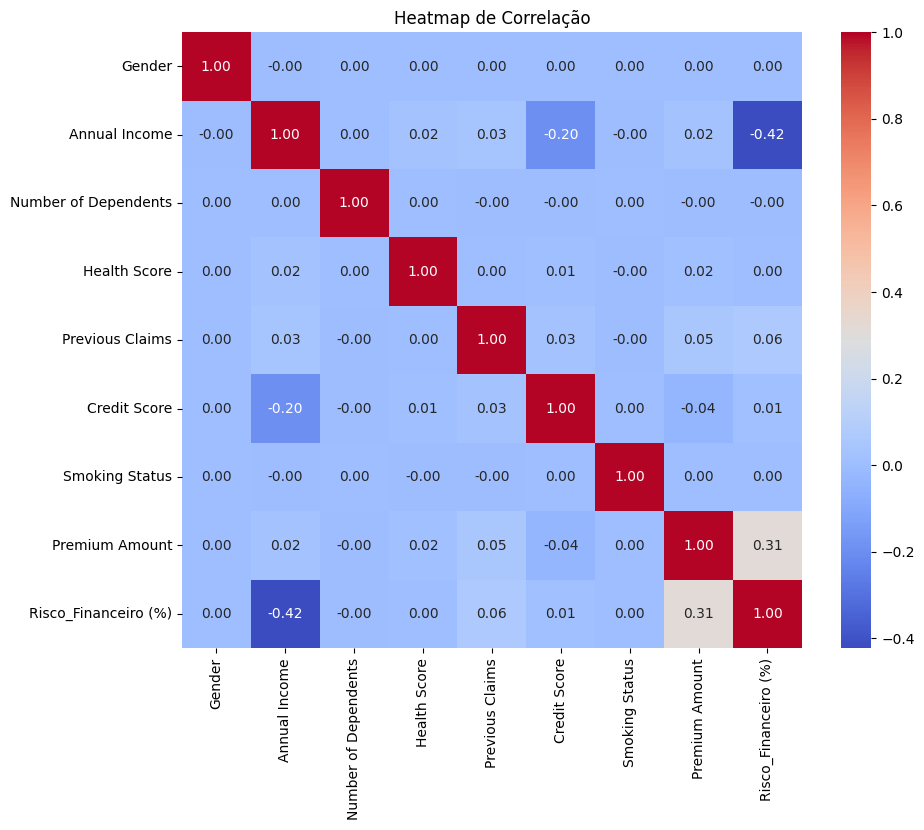

In [58]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_df = df[numerical_features]

matrix_correlation = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap de Correlação')
plt.show()

In [59]:
df = df.drop('Gender', axis=1)
df = df.drop('Number of Dependents', axis=1)

In [60]:
df = df.drop('Smoking Status', axis=1)

In [61]:
df.head()

,Annual Income,Marital Status,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Customer Feedback,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,10049.0,Married,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,372.0,Poor,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,31678.0,Divorced,Master's,Desconhecido,15.569731,Rural,Comprehensive,1.0,694.0,Average,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,25602.0,Divorced,High School,Self-Employed,47.177549,Suburban,Premium,1.0,595.0,Good,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,141855.0,Married,Bachelor's,Desconhecido,10.938144,Rural,Basic,1.0,367.0,Poor,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,39651.0,Single,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,598.0,Poor,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


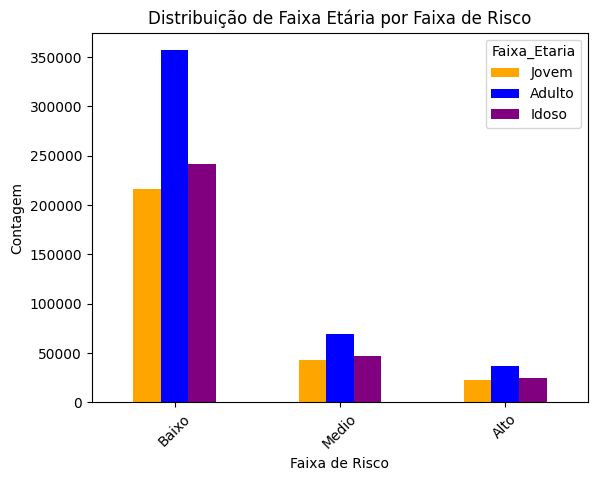

In [62]:
grouped_fe = df.groupby('Faixa_Risco', observed=True)['Faixa_Etaria'].value_counts()

grouped_fe.unstack().plot(kind='bar', color=['orange', 'blue', 'purple'])
plt.title('Distribuição de Faixa Etária por Faixa de Risco')
plt.xlabel('Faixa de Risco')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

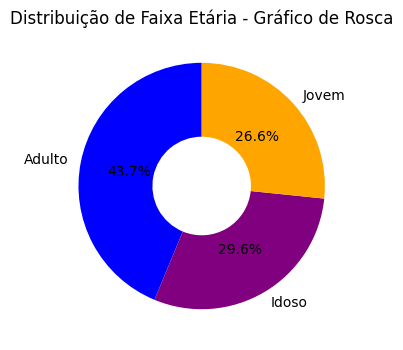

In [63]:
fe_counts = df['Faixa_Etaria'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(fe_counts, labels=fe_counts.index, autopct='%1.1f%%', startangle=90,
    colors=['blue', 'purple', 'orange'], wedgeprops={'width': 0.6})
plt.title('Distribuição de Faixa Etária - Gráfico de Rosca')
plt.show()

In [64]:
df.head()

,Annual Income,Marital Status,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Customer Feedback,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,10049.0,Married,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,372.0,Poor,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,31678.0,Divorced,Master's,Desconhecido,15.569731,Rural,Comprehensive,1.0,694.0,Average,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,25602.0,Divorced,High School,Self-Employed,47.177549,Suburban,Premium,1.0,595.0,Good,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,141855.0,Married,Bachelor's,Desconhecido,10.938144,Rural,Basic,1.0,367.0,Poor,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,39651.0,Single,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,598.0,Poor,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


In [65]:
X = df.drop('Premium Amount', axis=1)
y = df['Premium Amount']

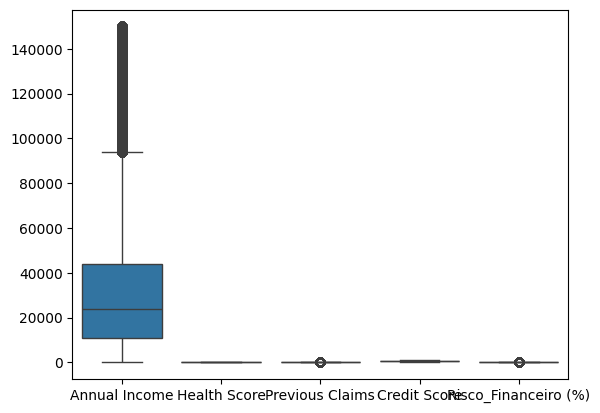

In [66]:
list_boxplot = df[['Annual Income', 'Health Score', 'Previous Claims', 'Credit Score', 'Risco_Financeiro (%)']]

sns.boxplot(data=list_boxplot)
plt.show()

In [67]:
df.head()

,Annual Income,Marital Status,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Customer Feedback,Exercise Frequency,Property Type,Premium Amount,Faixa_Etaria,Policy Start Year,Vehicle Age Category,Income_Class,Risco_Financeiro (%),Faixa_Risco
0,10049.0,Married,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,372.0,Poor,Weekly,House,2869.0,Jovem,2023,Antigo,Baixa,0.285501,Medio
1,31678.0,Divorced,Master's,Desconhecido,15.569731,Rural,Comprehensive,1.0,694.0,Average,Monthly,House,1483.0,Adulto,2023,Usado,Média,0.046815,Baixo
2,25602.0,Divorced,High School,Self-Employed,47.177549,Suburban,Premium,1.0,595.0,Good,Weekly,House,567.0,Jovem,2023,Antigo,Média,0.022147,Baixo
3,141855.0,Married,Bachelor's,Desconhecido,10.938144,Rural,Basic,1.0,367.0,Poor,Daily,Apartment,765.0,Jovem,2024,Novo,Alta,0.005393,Baixo
4,39651.0,Single,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,598.0,Poor,Weekly,House,2022.0,Jovem,2021,Usado,Alta,0.050995,Baixo


In [68]:
from sklearn.preprocessing import OneHotEncoder

features = ['Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback',
            'Exercise Frequency', 'Property Type', 'Faixa_Etaria', 'Policy Start Year', 'Vehicle Age Category',
            'Income_Class', 'Faixa_Risco']

onehot = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = onehot.fit_transform(df[features])

columns_to_encoded = onehot.get_feature_names_out(features)

encoded_df = pd.DataFrame(encoded_data, columns=columns_to_encoded, index=df.index)

df = pd.concat([df.drop(columns=features), encoded_df], axis=1)

df.head()

,Annual Income,Health Score,Previous Claims,Credit Score,Premium Amount,Risco_Financeiro (%),Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,...,Policy Start Year_2022,Policy Start Year_2023,Policy Start Year_2024,Vehicle Age Category_Novo,Vehicle Age Category_Relativamente Novo,Vehicle Age Category_Usado,Income_Class_Baixa,Income_Class_Média,Faixa_Risco_Baixo,Faixa_Risco_Medio
0,10049.0,22.598761,2.0,372.0,2869.0,0.285501,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,31678.0,15.569731,1.0,694.0,1483.0,0.046815,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,25602.0,47.177549,1.0,595.0,567.0,0.022147,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,141855.0,10.938144,1.0,367.0,765.0,0.005393,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,39651.0,20.376094,0.0,598.0,2022.0,0.050995,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [69]:
X = df.drop('Premium Amount', axis=1)
y = df['Premium Amount']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

In [72]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)

rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [73]:
from sklearn.metrics import r2_score

y_pred_rfr = rfr.predict(X_test_scaled)

score_rfr = r2_score(y_test, y_pred_rfr)

print(score_rfr)

0.9998913485687431


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

print(f"MAE: {mae_rfr}")
print(f"RMSE: {rmse_rfr}")

MAE: 5.848353878731732
RMSE: 8.723687066699503


In [75]:
resultados = pd.DataFrame({
    'Valor Real' : y_test,
    'Valor Previsto' : y_pred_rfr
})

resultados.head()

,Valor Real,Valor Previsto
847683,73.0,87.02
321460,991.0,991.51
161723,27.0,30.49
944787,1810.0,1804.37
627556,474.0,464.74
